# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dini Athirah Yasmin
- **Email:** diniathirahyasmin@gmail.com
- **ID Dicoding:** diniathirahy


### Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berubah dalam beberapa bulan terakhir? 
- Bagaimana pengaruh cuaca dengan jumlah peminjaman sepeda?
- Bagaimana perbandingan antara jumlah peminjam sepeda pada hari kerja dan hari libur?

### Import Packages/Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Wrangling

### Gathering Data

Melakukan load data day bertipe csv

In [3]:
day_path = "Bike-sharing-dataset\day.csv"
day_df = pd.read_csv(day_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melakukan load data hour bertipe csv

In [4]:
hour_path = "Bike-sharing-dataset\hour.csv"
hour_df = pd.read_csv(hour_path)
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

Memeriksa data terhadap missing value, tipe data, data terduplikat, dan statistika deskriptif

In [5]:
day_df.info()   # tidak ada missing value tetapi tipe data dari dteday seharusnya datetime bukan object 
print("jumlah duplikasi: ",day_df.duplicated().sum()) # tidak terdapat duplikasi dalam data
day_df.describe() # statistika deskriptif

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.info()  # tidak ada missing value tetapi tipe data dari dteday seharusnya datetime bukan object 
print("jumlah duplikasi: ",hour_df.duplicated().sum()) # tidak terdapat duplikasi dalam data
hour_df.describe() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengganti tipe data pada dteday menjadi tipe datetime

In [7]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info() 

hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Explanatory Data Analysis (EDA)

### Explore day_df

Explore Statistika Deskriptif 

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melihat pengaruh cuaca terhadap banyaknya peminjam sepeda

In [9]:
season_day = day_df.groupby("season").agg({
    "casual":"sum",
    "registered":"sum"
})
season_day["Total"] = season_day["casual"] + season_day["registered"]
season_day.rename(index={1:"springer",2:"summer", 3:"fall",4:"winter"}, inplace=True)
season_day.reset_index(inplace=True)
print(season_day)

     season  casual  registered    Total
0  springer   60622      410726   471348
1    summer  203522      715067   918589
2      fall  226091      835038  1061129
3    winter  129782      711831   841613


Melihat adanya hubungan atau pengaruh antara temperatur, kelembapan, dan kecepatan angin terhadap peminjam sepeda dengan menggunakan matriks varian covarian

In [10]:
day_df[["temp", "hum", "windspeed", "cnt"]].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


Perbandingan antara peminjam terdaftar dan umum pada working day

In [11]:
working_comp = day_df.groupby("workingday").agg({
    "casual":"sum",
    "registered":"sum"
})
working_comp["Total"] = working_comp["casual"] + working_comp["registered"]
working_comp.rename(index={0:"otherwise", 1:"weekend or holiday"})

,casual,registered,Total
workingday,,,
otherwise,316732,683537,1000269
weekend or holiday,303285,1989125,2292410


### Explore Data Hour

Statistika Deskriptif data hour

In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Mendeskripsikan pengaruh cuaca terhadap banyaknya peminjam sepeda

In [13]:
 season_hour = hour_df.groupby("season").agg({
    "casual":"sum",
    "registered":"sum"
})
season_hour["Total"] = season_hour["casual"] + season_hour["registered"]
season_hour.rename(index={1:"springer",2:"summer", 3:"fall",4:"winter"}, inplace=True)
print(season_hour)
type(season_day)

          casual  registered    Total
season                               
springer   60622      410726   471348
summer    203522      715067   918589
fall      226091      835038  1061129
winter    129782      711831   841613


pandas.core.frame.DataFrame

Melihat adanya hubungan atau pengaruh antara temperatur, kelembapan, dan kecepatan angin terhadap peminjam sepeda dengan menggunakan matriks varian covarian

In [14]:
hour_df[["temp", "hum", "windspeed", "cnt"]].corr()

,temp,hum,windspeed,cnt
temp,1.000000,-0.069881,-0.023125,0.404772
hum,-0.069881,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.290105,1.000000,0.093234
cnt,0.404772,-0.322911,0.093234,1.000000


Perbandingan antara peminjam terdaftar dan umum pada working day

In [15]:
working_comp1 = hour_df.groupby("workingday").agg({
    "casual":"sum",
    "registered":"sum"
})
working_comp1["Total"] = working_comp1["casual"] + working_comp1["registered"]
working_comp1.rename(index={0:"otherwise", 1:"weekend or holiday"})

,casual,registered,Total
workingday,,,
otherwise,316732,683537,1000269
weekend or holiday,303285,1989125,2292410


### Visualization & Explanatory Analysis

#### Pertanyaan : Bagaimana tren peminjaman sepeda berubah dalam beberapa bulan terakhir?

      dteday     cnt
0 2012-06-30    5687
1 2012-07-31  203607
2 2012-08-31  214503
3 2012-09-30  218573
4 2012-10-31  198841
5 2012-11-30  152664
6 2012-12-31  123713


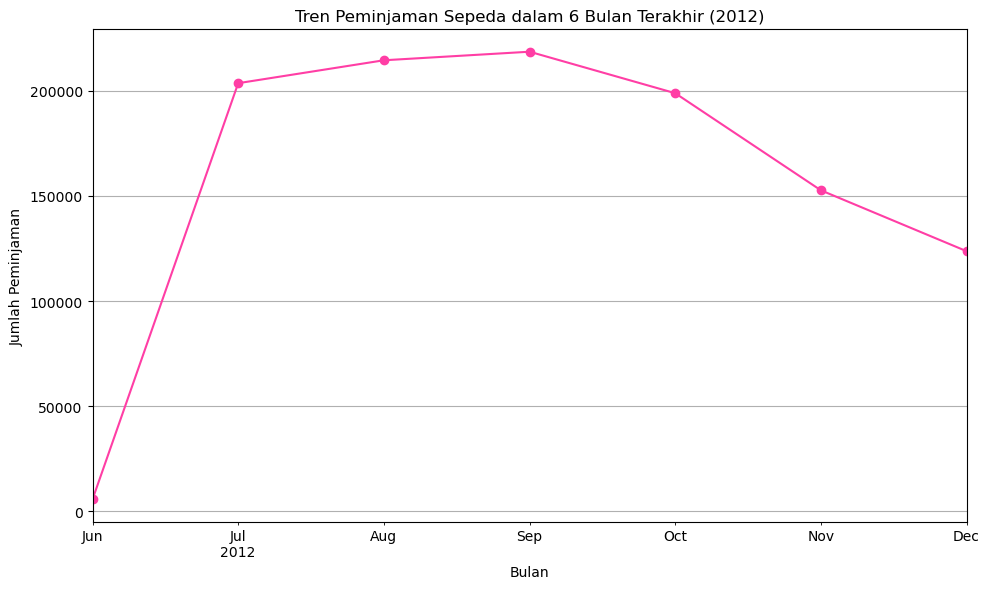

In [16]:
# Ubah tipe data  dteday ke datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])  

# Urutkan data berdasarkan tanggal
day_df = day_df.sort_values(by="dteday")  

# Menyeleksi Data untuk 6 bulan terakhir
recent_data = day_df[day_df["dteday"] >= day_df["dteday"].max() - pd.DateOffset(months=6)]

# Menghitung Total Peminjaman per Bulan
monthly_rentals = recent_data.groupby(pd.Grouper(key="dteday", freq="M"))["cnt"].sum()
monthly_rentals1 = monthly_rentals.reset_index()
print(monthly_rentals1)

#Buat line chart
plt.figure(figsize=(10, 6))
monthly_rentals.plot(marker="o", linestyle="-", color="#FF3EA5")
plt.title("Tren Peminjaman Sepeda dalam 6 Bulan Terakhir (2012)")
plt.grid(True)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#### Pertanyaan: Bagaimana perbandingan antara jumlah peminjam sepeda pada hari kerja dan hari libur?

<Figure size 1000x500 with 0 Axes>

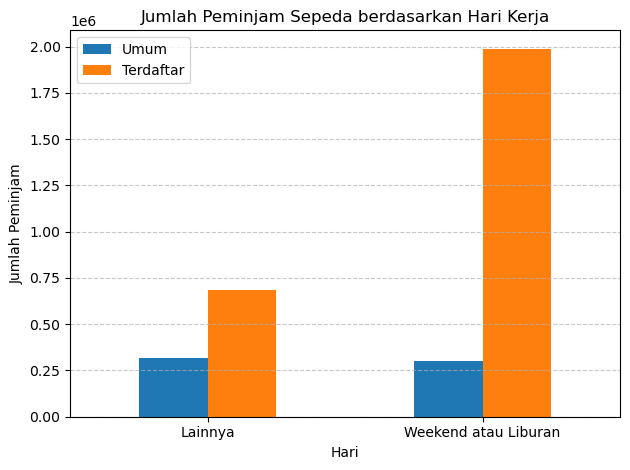

In [16]:
plt.figure(figsize=(10, 5))
working_comp[["casual", "registered"]].plot(kind="bar")
plt.title("Jumlah Peminjam Sepeda berdasarkan Hari Kerja")
plt.xticks([0, 1], ["Lainnya", "Weekend atau Liburan"], rotation=0)
plt.xlabel("Hari")
plt.ylabel("Jumlah Peminjam")
plt.legend(["Umum", "Terdaftar", "Total"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### Pertanyaan: Bagaimana pengaruh cuaca terhadap banyaknya peminjam sepeda?

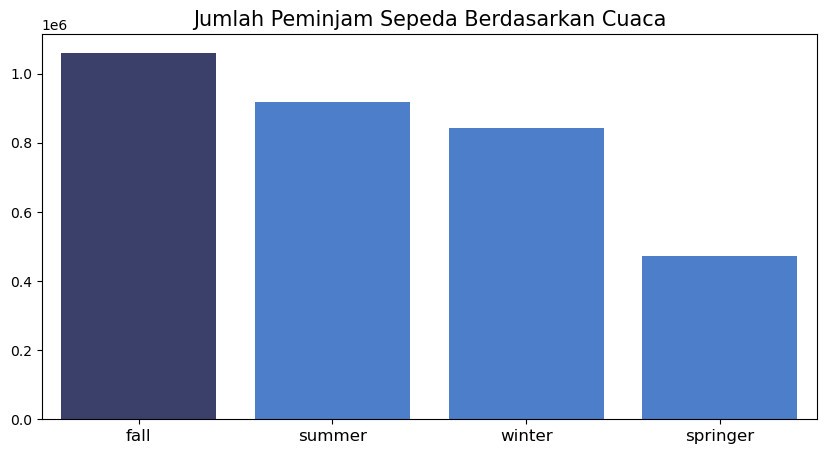

In [17]:
season_day = day_df.groupby("season").agg({
    "casual":"sum",
    "registered":"sum"
})
season_day["Total"] = season_day["casual"] + season_day["registered"]
season_day.rename(index={1:"springer",2:"summer", 3:"fall",4:"winter"}, inplace=True)
season_day.reset_index(inplace=True)

colors = ["#333A73", "#387ADF", "#387ADF", "#387ADF"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y ="Total",
    x = "season",
    data = season_day.sort_values(by="Total", ascending=False),
    palette = colors
)
plt.title("Jumlah Peminjam Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [18]:
working_comp = day_df.groupby("workingday").agg({
    "cnt":"sum"
})
working_comp.rename(index={0:"otherwise", 1:"weekend or holiday"}, inplace=True)
working_comp.reset_index(inplace=True)
working_comp.head()

,workingday,cnt
0,otherwise,1000269
1,weekend or holiday,2292410


In [19]:
!pip freeze > requirements.txt

## Conclusion

- Conclusion Pertanyaan:  Bagaimana Tren Peminjaman Sepeda Berubah Selama Beberapa Bulan Terakhir?

Dilihat dari line chart yang dihasilkan dari data jumlah peminjam sepeda selama enam bulan terakhir pada tahun 2012 mengalamai kenaikan yang cukup signifikan. Kenaikan tertinggi terjadi pada rentang waktu bulan Juni hingga Juli dari total jumlah peminjam sepeda 5687 ke 203607 atau meningkat sebesar 35,8 kali dari bulan sebelumnya. Jumlah peminjam sepeda tertunggi terjadi pada bulan September yaitu sebesar 218573 yang kemudian menurun pada bulan - bulan selanjutnya.

- Conclusion pertanyaan:  Bagaimana perbandingan antara jumlah peminjam sepeda pada hari kerja dan hari libur?

Berdasarkan bar chart yang telah dibuat, jumlah peminjam sepeda pada weekend atau musim liburan lebih tinggi 43,6% dibandingkan dengan hari lainnya. Hal tersebut wajar terjadi dikarenakan pada weekend atau musim libur sebagian besar orang menikmatinya dengan bersepeda. Statistik juga menunjukkan bahwa peminjam sepeda yang telah terdaftar (berlangganan) lebih dominan daripada peminjam umum, baik pada weekend atau musim libur maupun pada hari lainnya.

- Conclusion pertanyaan: Bagaimana pengaruh cuaca terhadap banyaknya peminjam sepeda?

Berdasarkan bar chart yang telah dibuat, jumlah peminjam sepeda pada musim gugur menjadi yang tertinggi dibandingkan dengan tiga musim lainnya dengan jumlah peminjam sepeda sebesar 1061129 orang. Kemudian peringkat kedua jumlah peminjam sepeda terbanyak yaitu pada musim panas lalu ketiga yaitu musin dingin dan yang terakhir adalah musim semi. 